In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error


%matplotlib inline

#plt.style.use('seaborn-whitegrid')

In [2]:
df = pd.read_excel('../archive/autoMPG_data.xlsx')

In [3]:
# df
# df.shape
df.head(n=10)
# df.tail(n=10)
# df.describe
# df.columns
# df.isnull().sum()
# df.dtypes

,GallonsPer100Miles,GallonsPer100MilesTo1981,MPG,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year,Year70To81,Origin,Origin.Eq.1,Origin.Eq.2,Origin.Eq.3,Name
0,5.555556,5.555556,18.0,8,3.07,1.30,3.504,12.0,70,1,1,1,0,0,chevrolet chevelle malibu
1,6.666667,6.666667,15.0,8,3.50,1.65,3.693,11.5,70,1,1,1,0,0,buick skylark 320
2,5.555556,5.555556,18.0,8,3.18,1.50,3.436,11.0,70,1,1,1,0,0,plymouth satellite
3,6.250000,6.250000,16.0,8,3.04,1.50,3.433,12.0,70,1,1,1,0,0,amc rebel sst
4,5.882353,5.882353,17.0,8,3.02,1.40,3.449,10.5,70,1,1,1,0,0,ford torino
5,6.666667,6.666667,15.0,8,4.29,1.98,4.341,10.0,70,1,1,1,0,0,ford galaxie 500
6,7.142857,7.142857,14.0,8,4.54,2.20,4.354,9.0,70,1,1,1,0,0,chevrolet impala
7,7.142857,7.142857,14.0,8,4.40,2.15,4.312,8.5,70,1,1,1,0,0,plymouth fury iii
8,7.142857,7.142857,14.0,8,4.55,2.25,4.425,10.0,70,1,1,1,0,0,pontiac catalina
9,6.666667,6.666667,15.0,8,3.90,1.90,3.850,8.5,70,1,1,1,0,0,amc ambassador dpl


In [4]:
# pitää droppaa nimet
df = df.drop("Name",axis='columns')

# nullei 30, nää autot on valmistettu 1981 jälkeen. Ei dropata.


In [5]:
# Meidän muuttuja jota halutaan ennustaa.
y = df['GallonsPer100Miles']

# Kaikki yksittäisinä, pitää käyttää .to_frame() metodia jos halutaan kouluttaa malli yksittäisellä koska muuten se on series eikä dataframe. Tulee error.
# .to_frame()
# X = df['Cylinders']
# X = df['Displacement100ci']
# X = df['Horsepower100']
X = df['Weight1000lb']
# X = df['Seconds0to60']

# tähän joku loop miten se ottaa kaikki mahdolliset X:t
# Näis ei tarvii käyttää .to_frame() metodia koska ne on jo dataframeja.
# X = df[['Cylinders', 'Displacement100ci', 'Horsepower100', 'Weight1000lb', 'Seconds0to60']]

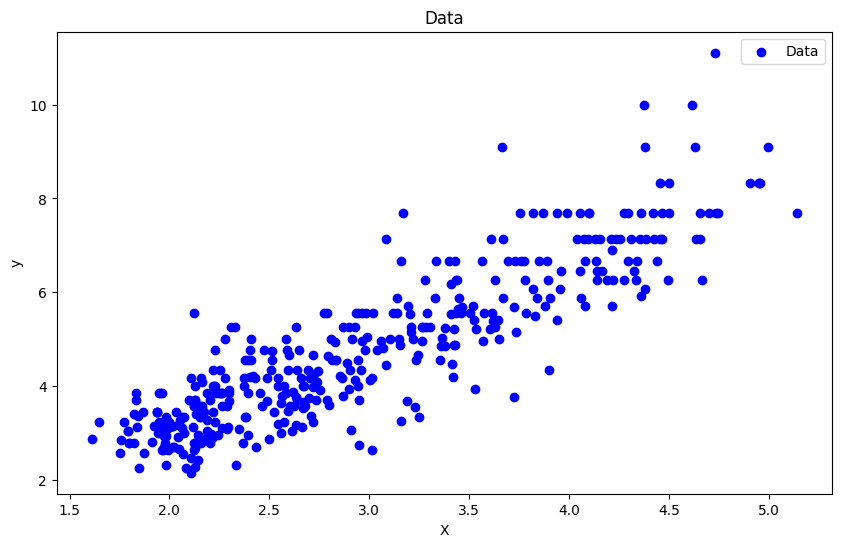

In [6]:
# Toimii vaa yksittäisellä
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Data")
plt.legend()
plt.show()

In [7]:
# Yksittäinen X, kato onko riippuvuutta. Eli korrelaatio kerroin.
# Tähän joku loop ja käy läpi kaikki vari<ablet. Käydää läpi kaikki riippuvuudet ja valitaan top 3.

correlation_matrix = np.corrcoef(X, y)
r = correlation_matrix[0, 1] 
print("Correlation Coefficient (R):", r)

Correlation Coefficient (R): 0.8850559772615422


# Yksittäinen

In [8]:
X = df['Weight1000lb'].to_frame()

fuel_model = LinearRegression().fit(X,y)

In [9]:
y_pred = fuel_model.predict(X)

In [10]:
# tää on se punanen viiva, eli ennustettu lineaarinen malli
y_pred

array([5.69493587, 6.02262168, 5.57703833, 5.57183697, 5.59957757,
       7.14611588, 7.16865511, 7.09583605, 7.29175402, 6.29482629,
       5.79722932, 5.87698354, 6.14051922, 4.97021276, 3.73228859,
       4.53156456, 4.42927111, 4.10505287, 3.31271206, 2.80124479,
       4.2524248 , 3.83284826, 3.73748996, 3.49302594, 4.2108139 ,
       7.62117361, 7.20679844, 7.21720116, 7.82402673, 3.31271206,
       3.54503956, 3.48262322, 4.18654088, 5.58223969, 5.39152309,
       5.34471083, 5.3204378 , 6.91725595, 7.35937172, 6.82189765,
       6.72133798, 8.21066131, 7.84829975, 8.53141197, 4.75522313,
       3.79470494, 5.31003508, 5.06210349, 3.46875292, 3.30057555,
       3.21561997, 3.20001588, 2.69374997, 2.416344  , 2.799511  ,
       3.00929927, 3.56931258, 3.30577691, 3.52770169, 3.79470494,
       3.47915564, 7.02995213, 7.22240252, 6.78895569, 6.77855296,
       5.98621214, 7.65238178, 7.42525564, 7.34550142, 7.28655265,
       3.65946953, 6.36764536, 6.72480555, 7.06462787, 6.68839

In [11]:
# R^2-pistemäärän laskeminen
r2 = fuel_model.score(X,y)
# Tulos
print("Coefficient of Determination (R^2):", r2)

Coefficient of Determination (R^2): 0.7833240828863839


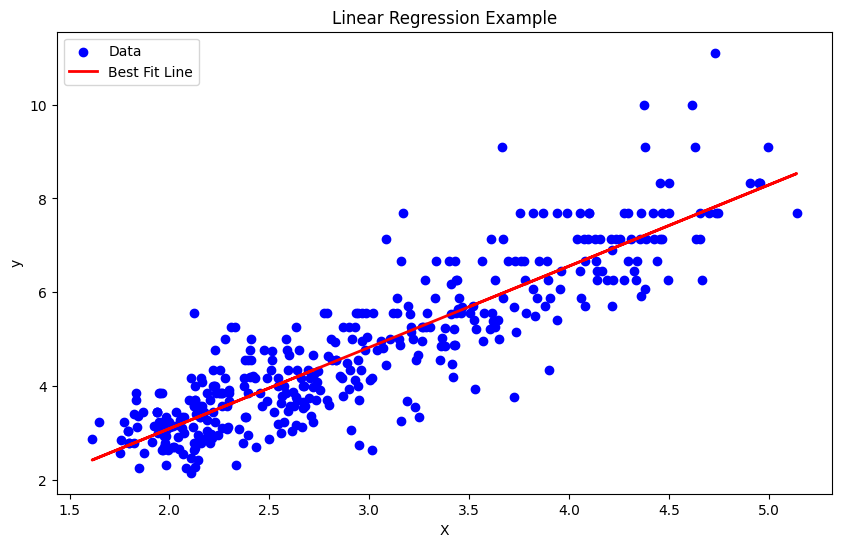

Intercept: -0.3802549901551391
Slope: [1.73378735]
Correlation Coefficient (R): 0.8850559772615422
Coefficient of Determination (R^2): 0.7833240828863839
Mean Absolute Error (MAE): 0.578607083919784
Mean Absolute Percentage Error (MAPE): 0.1308114853838771
Mean Squared Error (MSE): 0.5983821695835889


In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, fuel_model.predict(X), color='red', linewidth=2, label='Best Fit Line')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Example")
plt.legend()
plt.show()

print("Intercept:", fuel_model.intercept_)
print("Slope:", fuel_model.coef_)
print("Correlation Coefficient (R):", r)
print("Coefficient of Determination (R^2):", r2)
print("Mean Absolute Error (MAE):", mean_absolute_error(y, y_pred))
print("Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(y, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y, y_pred))

# Enemmän X arvoja

In [13]:
# Laitetaan tähän se laurin versio
X = df[['Cylinders', 'Displacement100ci', 'Horsepower100', 'Weight1000lb', 'Seconds0to60']]

fuel_model = LinearRegression().fit(X,y)

print(fuel_model.score(X,y))

0.8207948199718269


# Ennustetaan arvoja

In [14]:
# mitä´mietä ollaan, score. Onko malli hyvä

In [15]:
# interpolation range
# extrapolation range

# Train ja test

In [16]:
target = 'GallonsPer100Miles'
features = ["Weight1000lb", "Horsepower100", "Cylinders"]

In [17]:
X = df[features]
y = df[target]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [21]:
print("Training r-squared:", r2_score(y_train, y_pred_train))
print("Testing r-squared:", r2_score(y_test, y_pred_test))
print("Testing Mean Squared Error:", mean_squared_error(y_test, y_pred_test))

Training r-squared: 0.8119856204571912
Testing r-squared: 0.8389349682342523
Testing Mean Squared Error: 0.4128004894988242
